In [600]:
%run Function_set_dic.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [601]:
network,pos = Make_Question(4,3,Density = 0.85, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (9, 0): '8', (10, 0): '9', (1, 2): '10', (1, 5): '11', (2, 3): '13', (2, 6): '14', (3, 4): '16', (3, 7): '17', (4, 8): '19', (5, 6): '21', (5, 9): '22', (6, 7): '25', (6, 10): '26', (7, 8): '29', (9, 10): '33', (2, 1): '12', (3, 2): '15', (4, 3): '18', (5, 1): '20', (6, 2): '23', (6, 5): '24', (7, 3): '27', (7, 6): '28', (8, 4): '30', (8, 7): '31', (9, 5): '32', (10, 6): '34', (10, 9): '35'}


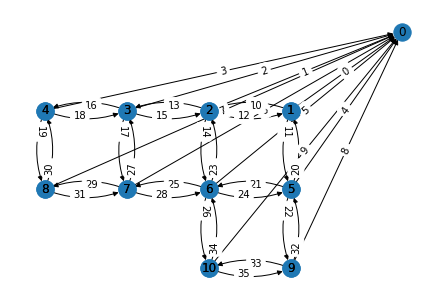

In [602]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

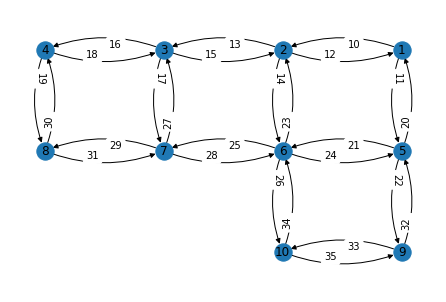

In [603]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

In [604]:
print(compelete_label)

{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (9, 0): '8', (10, 0): '9', (1, 2): '10', (1, 5): '11', (2, 3): '13', (2, 6): '14', (3, 4): '16', (3, 7): '17', (4, 8): '19', (5, 6): '21', (5, 9): '22', (6, 7): '25', (6, 10): '26', (7, 8): '29', (9, 10): '33', (2, 1): '12', (3, 2): '15', (4, 3): '18', (5, 1): '20', (6, 2): '23', (6, 5): '24', (7, 3): '27', (7, 6): '28', (8, 4): '30', (8, 7): '31', (9, 5): '32', (10, 6): '34', (10, 9): '35'}


In [605]:
#%run Function_set_dic.ipynb
#Final_map, lowest_edge_number = edge_map(G, compelete_label, sub_edge_label)


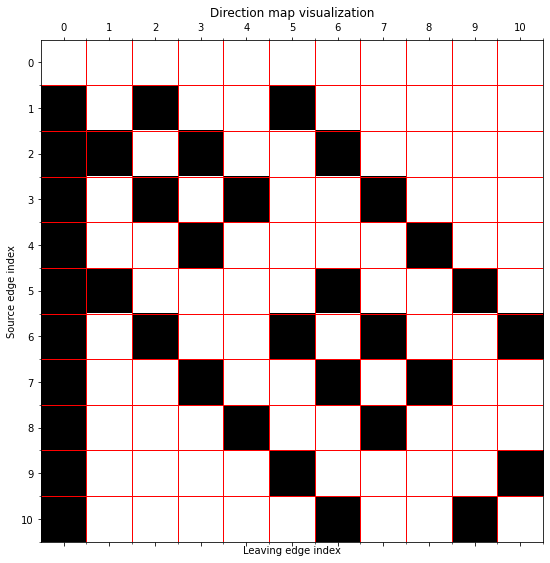

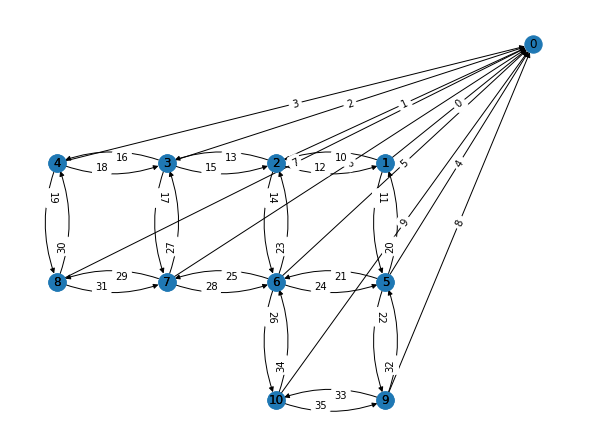

In [606]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(network,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, network.shape[0], step=1))
ax.set_yticks(np.arange(0, network.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, network.shape[0], step=1))
ax.set_yticklabels(np.arange(0, network.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [607]:
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1
print(Q)

# How many edges
edge_number = len(compelete_label)

# make dictionary
edge_dictionary,Total = make_dictionary(edge_number, Q)

# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.ones(edge_number)

# flow cost (p)
flow_cost = np.ones(edge_number)


# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((edge_number*Q,edge_number*Q))



10


In [665]:
%run Function_set_dic.ipynb

QUBO_Obj = Objective(Q, edge_number, edge_dictionary, QUBO_matrix_initial, basic_cost,flow_cost)

penal = 1000

print("penalty=" , penal)

penalty= 1000


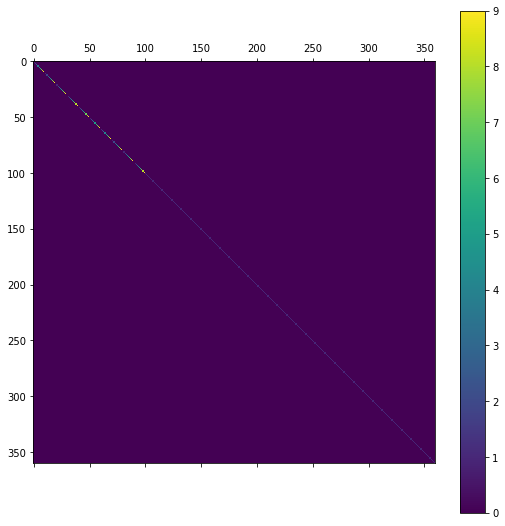

In [666]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Obj,fignum=matfig.number)
plt.colorbar()
plt.show()

In [667]:
%run Function_set_dic.ipynb
QUBO_Constraint_1 = Constraint_1(network, Q, edge_number, edge_dictionary, compelete_label, QUBO_matrix_initial, penalty = penal)

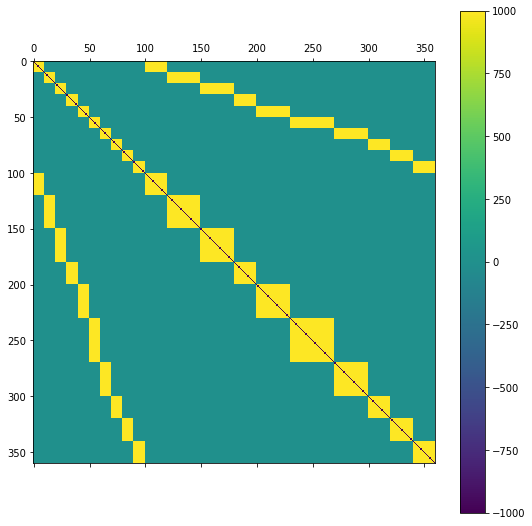

In [698]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_1,fignum=matfig.number)
plt.colorbar()
plt.show()

In [699]:
print(edge_number)

36


In [700]:
%run Function_set_dic.ipynb
QUBO_Constraint_2 = Constraint_2(network, Q, edge_number, edge_dictionary, compelete_label, QUBO_matrix_initial, penalty = penal)

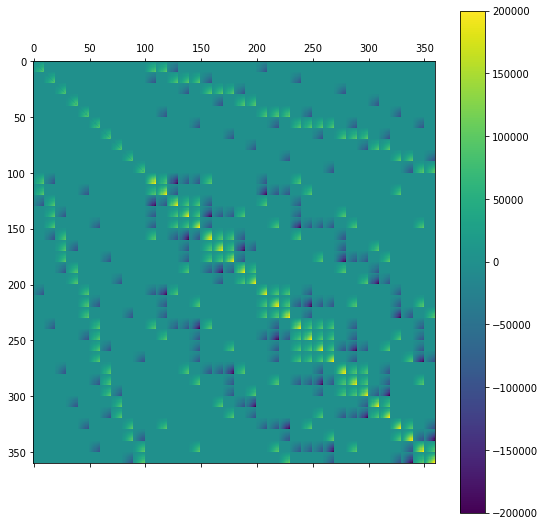

In [701]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [702]:
%run Function_set_dic.ipynb
QUBO_Constraint_add = Constraint_add(network, Q, edge_number, compelete_label, edge_dictionary, QUBO_matrix_initial, penalty = penal * 20)    

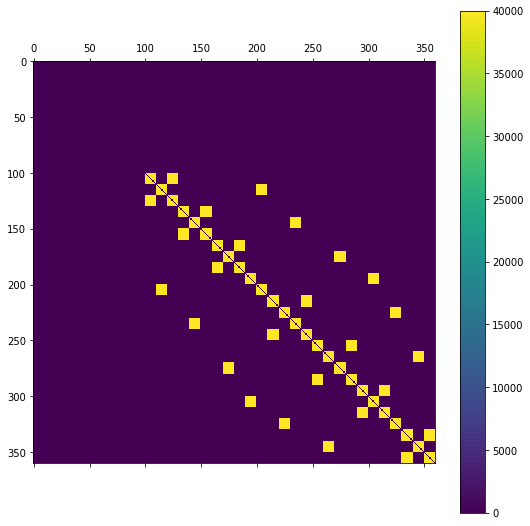

In [703]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_add,fignum=matfig.number)
plt.colorbar()
plt.show()

In [704]:
QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2 + QUBO_Constraint_add

print(np.shape(QUBO_matrix ))

(360, 360)


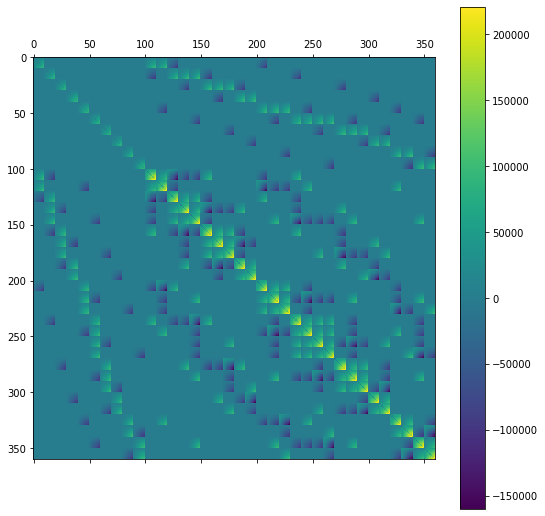

In [705]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [706]:
%run Function_set_dic.ipynb
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,Q)

m_t_u[:] = 0
m_t_l[:] = 0
m_t_u[2:] = 3
m_t_l[2:] = 1

print('m_t_l = ', m_t_l)

m_t_u = np.where(m_t_u < m_t_l, m_t_l, m_t_u)

print('m_t_u = ', m_t_u)


#QUBO_matrix_copy = QUBO_matrix

m_t_l =  [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
m_t_u =  [0. 0. 3. 3. 3. 3. 3. 3. 3. 3.]


In [707]:

QUBO_matrix, QUBO_C3_p1, edge_dictionary_C31 = Constraint_3_part_1(network, m_t_u, Q, edge_number, edge_dictionary, QUBO_matrix, penalty = penal)


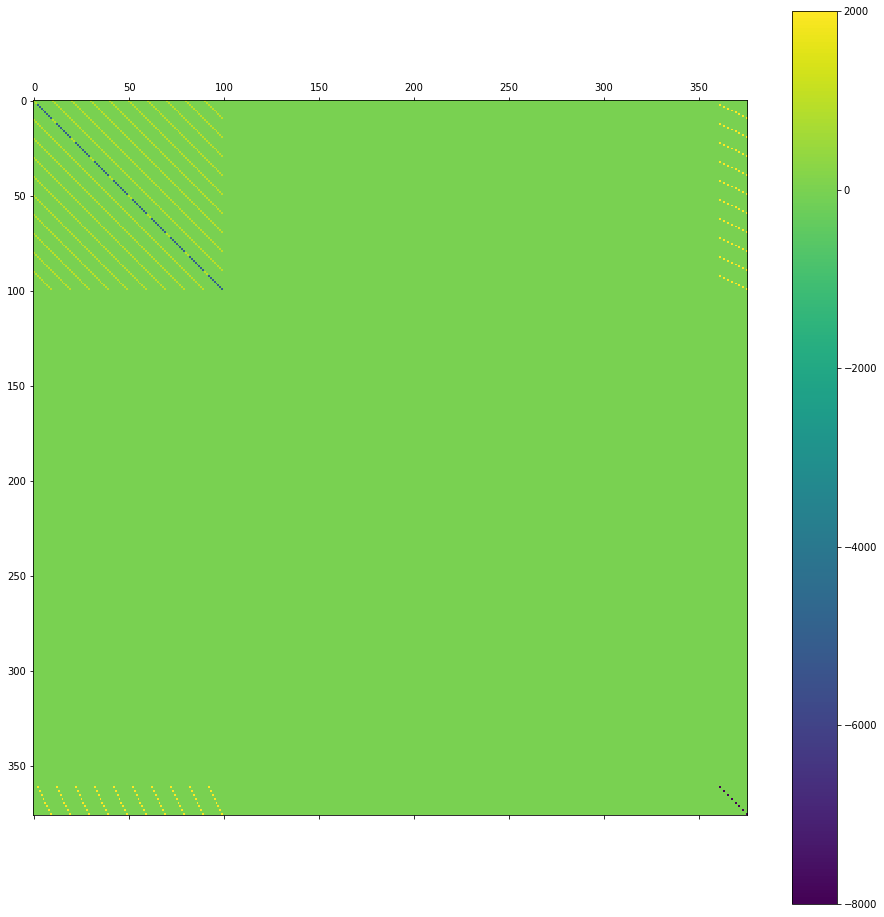

In [708]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p1 ,fignum=matfig.number)
plt.colorbar()
plt.show()

In [709]:
QUBO_matrix, QUBO_C3_p2, edge_dictionary_C32 = Constraint_3_part_2(network, m_t_l, Q, edge_number, edge_dictionary_C31, QUBO_matrix, penalty = penal)

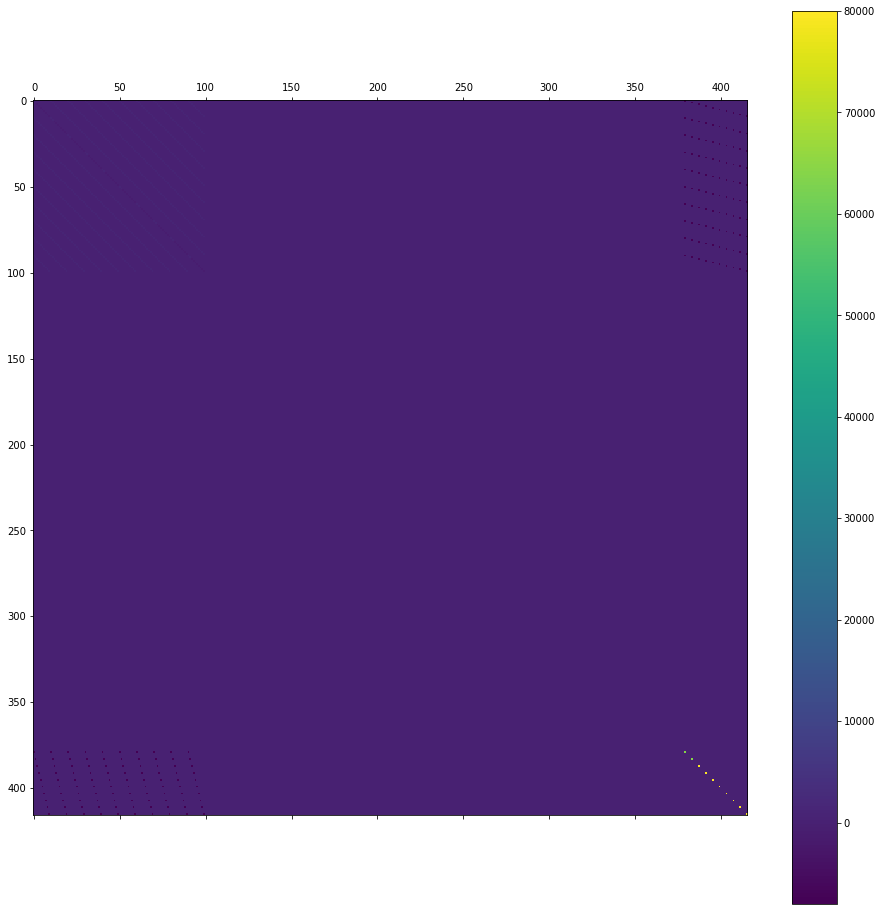

In [710]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p2,fignum=matfig.number)
plt.colorbar()
plt.show()

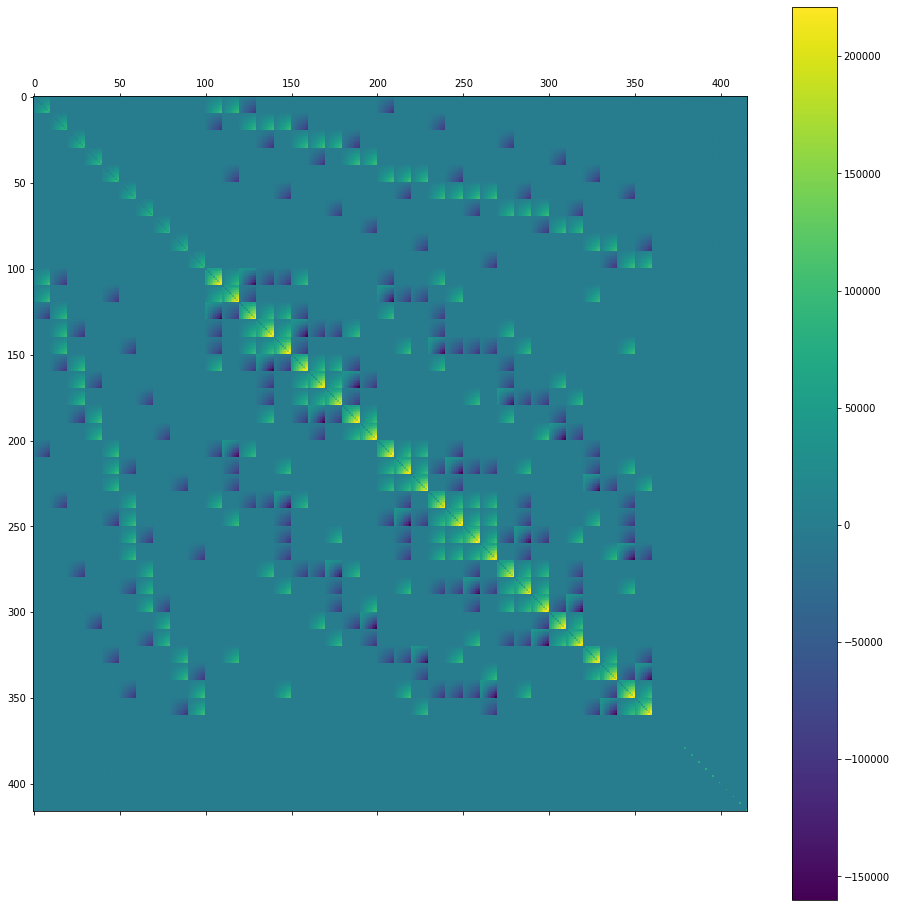

In [711]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [712]:
# Bus edge Ban map( Q ** 2)  可以通过就是 1 不可以就是 0
Ban_map_Bus = np.ones( Q**2 )



Final_QUBO_matrix, QUBO_Constraint_4 = Constraint_4(QUBO_matrix, Q, Ban_map_Bus ,penalty = 1e6)


print(np.shape(Final_QUBO_matrix))

(416, 416)


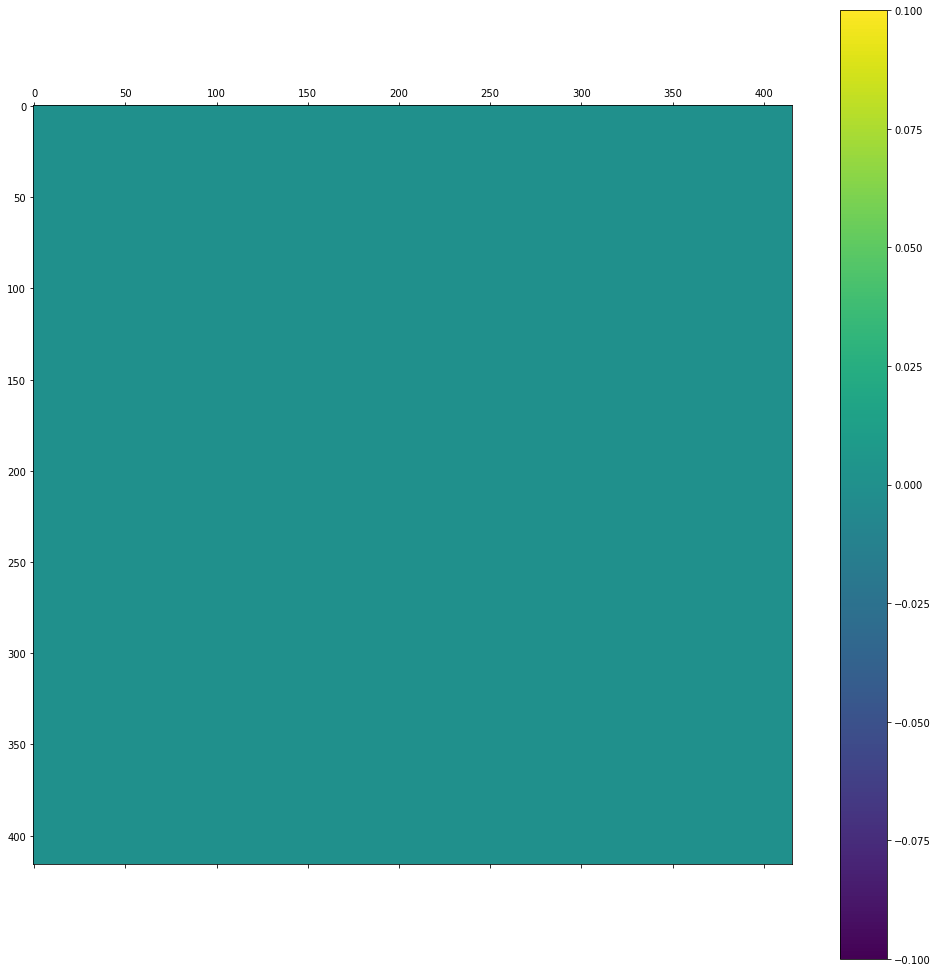

In [713]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(QUBO_Constraint_4,fignum=matfig.number)
plt.colorbar()
plt.show()

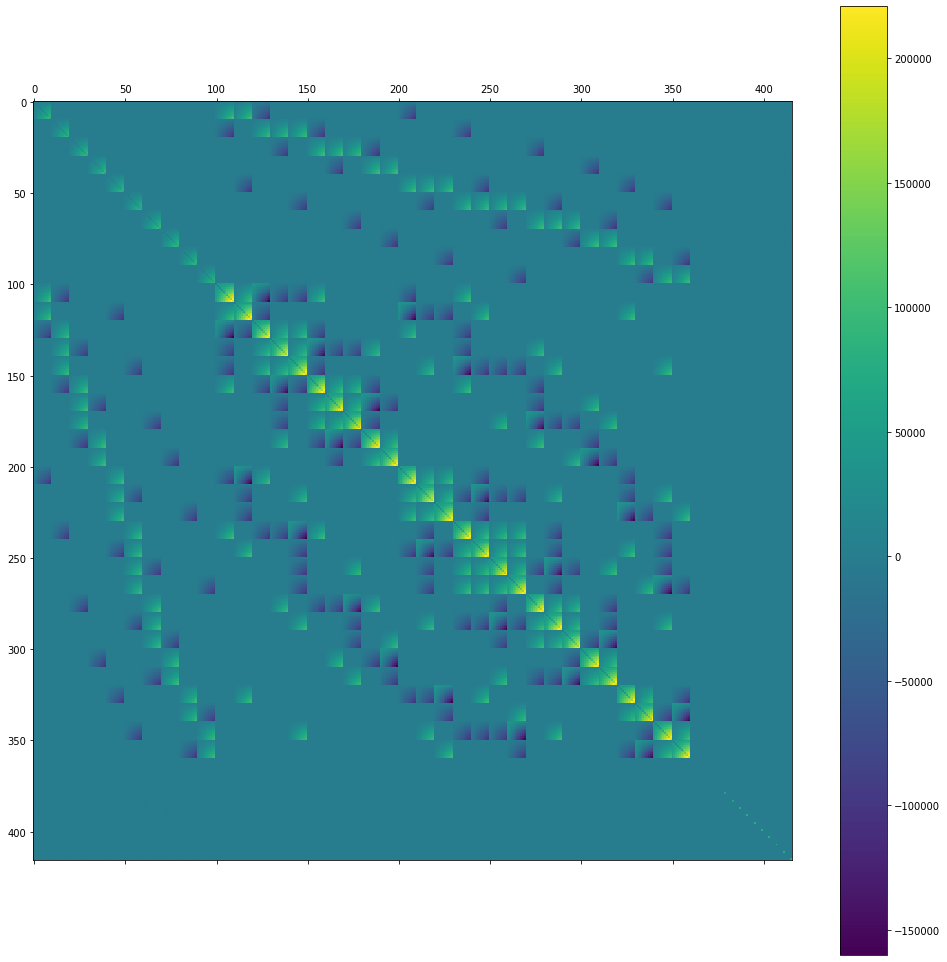

In [714]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(Final_QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [715]:
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt

In [716]:
QUBO = Final_QUBO_matrix
#QUBO = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2 + QUBO_Constraint_add

In [717]:
width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)




[ 53  72  84 110 140 170 190 222 281 350 360 361 362 363 365 367 368 369
 370 371 372 373 375 376 380 382 389 392 394 396 397 400 401 402 404 405
 406 409 410 412 413]
[ 53  72  84 110 140 170 190 222 281 350]
[ 5  7  8 11 14 17 19 22 28 35]
[3 2 4 0 0 0 0 2 1 0]


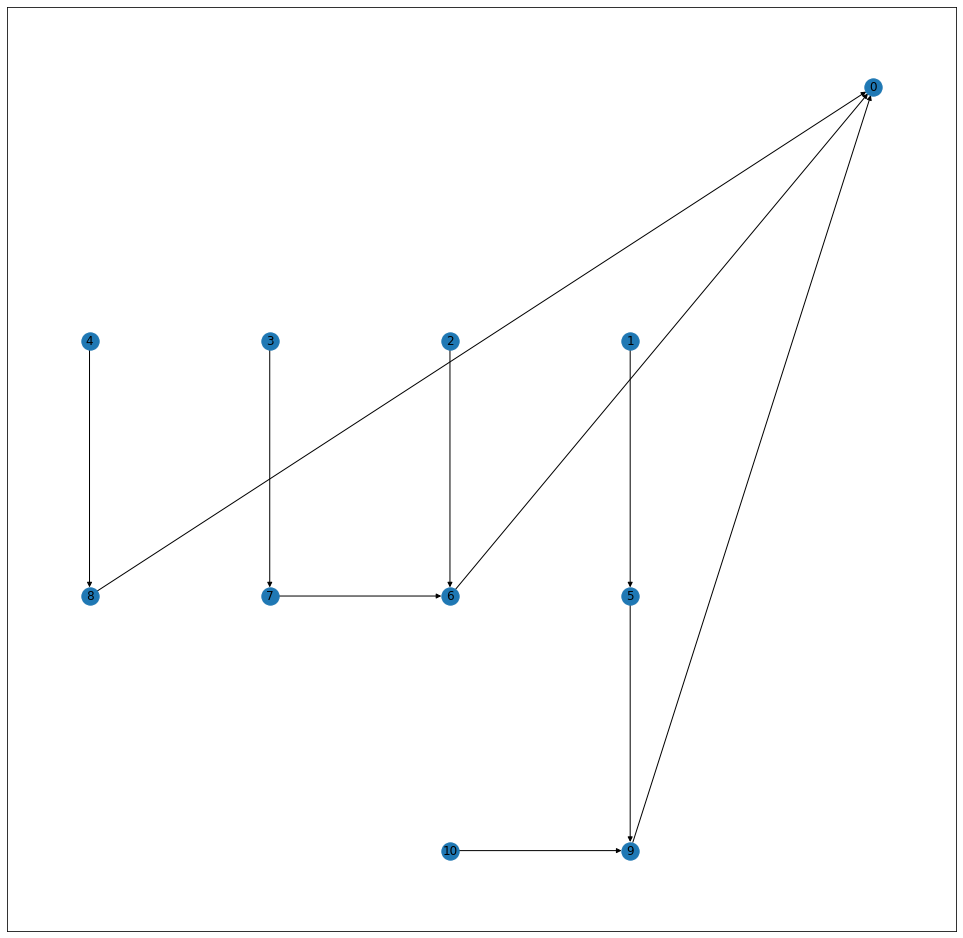

In [718]:
OP = sampleset.to_pandas_dataframe()
import pandas as pd

OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

sampleset.info['qpu_access_time']

location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)

final_index = location[location < edge_number * Q ]
print(final_index)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

print(str(final_index//Q))
print(str(final_index%Q))

for value in final_index:
    #print(str(value//Q))
    final_G .add_edges_from([edge for edge, label in compelete_label.items() if label == str(value//Q)])
    
matfig = plt.figure(figsize=(17,17)) 
nx.draw_networkx(final_G, pos)

In [719]:
Final_answer = sample[:edge_number*Q]

In [720]:
%run Function_set_dic.ipynb
check_1(Final_answer, network, Q, edge_number, edge_dictionary)

True


In [721]:
print(Q)
print(final_index//Q)
print(final_index%Q)

10
[ 5  7  8 11 14 17 19 22 28 35]
[3 2 4 0 0 0 0 2 1 0]


In [214]:

    
    
    #G.add_edges_from([(1, 2), (1, 3), (2, 3)])

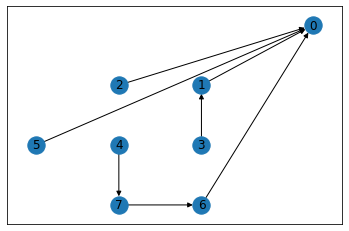

In [215]:
nx.draw_networkx(final_G, pos)


In [227]:
[edge for edge, label in compelete_label.items() if label == str(0)]

[(1, 0)]

In [ ]:

'''
首先可以加的部分，导线长度 || pos - vertex ||_{1} 转化为成本


'''